# Big Data Mart Sales Problem

# Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:
- bigdatamart_Train.csv: Use this file for the model building purpose. 
- bigdatamart_Test.csv: Use this file for getting predictions from the trained model.


# Importing Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost 
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
train = pd.read_csv('bigdatamart_train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test=pd.read_csv('bigdatamart_test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
# no. of rows and coloumns

train.shape,test.shape

((8523, 12), (5681, 11))

As said above we have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns.

In [5]:
train.isnull().sum(), test.isnull().sum()

(Item_Identifier                 0
 Item_Weight                  1463
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  2410
 Outlet_Location_Type            0
 Outlet_Type                     0
 Item_Outlet_Sales               0
 dtype: int64,
 Item_Identifier                 0
 Item_Weight                   976
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  1606
 Outlet_Location_Type            0
 Outlet_Type                     0
 dtype: int64)

We have missing values in Item weight and Outlet_Size columns in train and test datas.

In [6]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

(None, None)

Categorical Features in Train Set: 7

Numerical Features in Train Set: 5

Categorical Features in Test Set: 7

Numerical Features in Test Set: 4

In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# Merging Train & Test Dataset for better EDA

In [9]:
train.columns, test.columns

(Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales'],
       dtype='object'),
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type'],
       dtype='object'))

There are no spaces present in columns in train set.

Shows Correct Column Names.

Target Col (Item_Outlet_Sales) Missing in test set.

As we can see train set has 12 col and test set has 11 col.

where target col is present in train set so i have merged train & test as on one file for EDA

And will split the file back again in train & test before applying algorithm.

In [10]:
train['reference']='train'
test['reference']='test'

In [11]:
train.columns, test.columns

(Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales', 'reference'],
       dtype='object'),
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'reference'],
       dtype='object'))

New Reference column is added in train & test set to differentiate train & test set

In [12]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,reference
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [13]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,reference
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test


Reference Col Shows Value as train & test in reference variable of test set and train set before merging.

# Merging train & test set

In [14]:
merge_train_test = [train,test]

In [15]:
df= pd.concat(merge_train_test)

New dataframe is created as df after merging train & test set.

as we can see train set has 12 col and test set has 11 col. where target col is present in train set so i have merged train & test as on one file for better EDA
dataset is merged to treat missing value, outliers, skewness etc.

the new dataframe (df) will split back again in train & test before applying algorithm.

After merging the new dataframe will show 5681 as missing value in target column because the same target is missing in test set.
The missing value in target col after merging will be treated later.

In [16]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,reference
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [17]:
df.shape

(14204, 13)

the new dataframe after merging shows 14204 rows and 13 column

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  reference                  14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

the new df shows reference col which was created to diff train & test set which is indexed at 12.

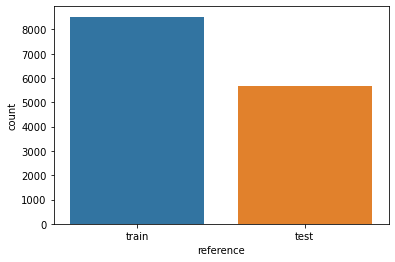

In [19]:
sns.countplot(df['reference']);

The count plot shows the new df is merged with reference col to diff train & test set.

In [20]:
df.groupby('reference').size()

reference
test     5681
train    8523
dtype: int64

the new df is differentiated with reference col.

the new df has 8523 observations belongs to train set.

the new df has 5681 observations belongs to test set.

the new df will be splitted back into train & test after EDA treatment.

# Column : Item_Fat_Content Treatment:

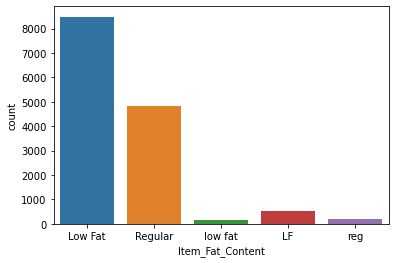

In [21]:
sns.countplot(df['Item_Fat_Content']);

 the plot shows that Item_Fat_Content has duplicate entries which is treated below.

In [22]:
df.groupby('Item_Fat_Content').size()

Item_Fat_Content
LF          522
Low Fat    8485
Regular    4824
low fat     178
reg         195
dtype: int64

In [23]:
df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace = True)

Duplicate entries are treated with Low Fat & Regular Fat

Duplicate Entries of 'LF' is replace with 'Low Fat'

Duplicate Entries of 'low fat' is replace with 'Low Fat'

Duplicate Entries of 'reg' is replace with 'Regular'

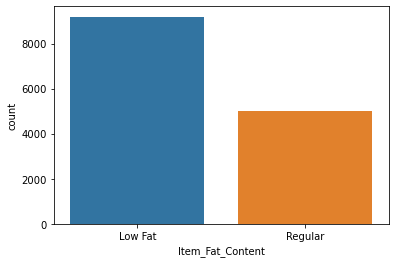

In [24]:
sns.countplot(df['Item_Fat_Content']);

In [25]:
df.groupby('Item_Fat_Content').size()

Item_Fat_Content
Low Fat    9185
Regular    5019
dtype: int64

After replacing duplicate Low Fat has 9185 obs Regular has 5019 obs.

# Categorical Variable Analysis.

In [26]:
df.groupby('Item_Type').size()

Item_Type
Baking Goods             1086
Breads                    416
Breakfast                 186
Canned                   1084
Dairy                    1136
Frozen Foods             1426
Fruits and Vegetables    2013
Hard Drinks               362
Health and Hygiene        858
Household                1548
Meat                      736
Others                    280
Seafood                    89
Snack Foods              1989
Soft Drinks               726
Starchy Foods             269
dtype: int64

Shows different itme type and values present in dataset.

Fruits & Vegetables has highest entries present in dataset.

Sea food entries is the least one.

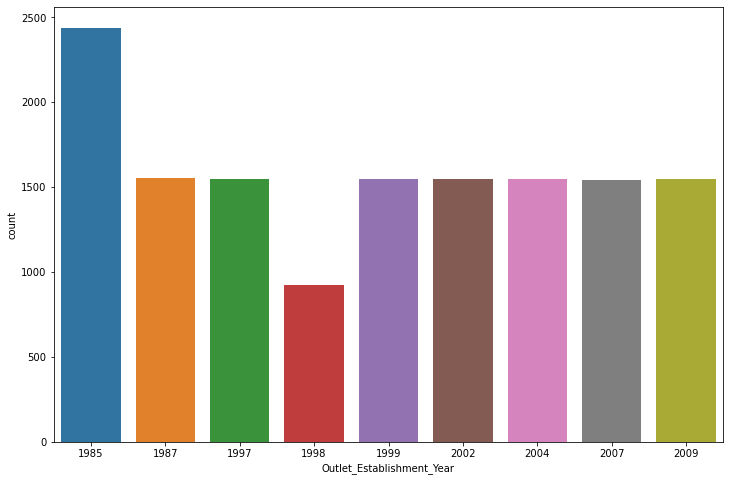

In [27]:
fig, ax =plt.subplots(figsize=(12,8))
sns.countplot(df['Outlet_Establishment_Year']);

Most of the outlet had established in the year 1985 as seen in plot above.

The least outlet established in the year 1998.

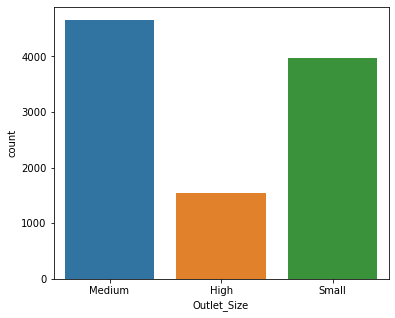

In [28]:
fig, ax =plt.subplots(figsize=(6,5))
sns.countplot(df['Outlet_Size']);

Medium Type Outlet Size is the highest among all.

the count of Highest outlet size is the least

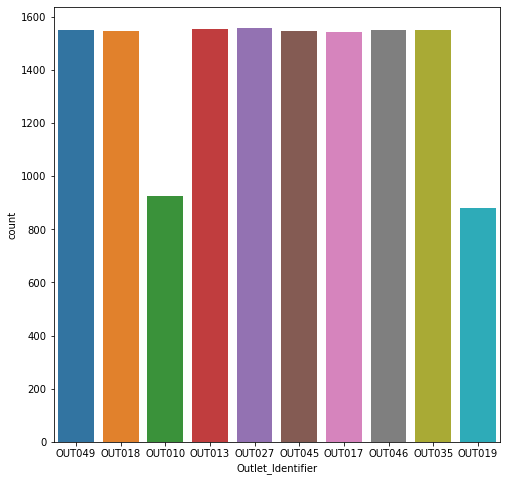

In [29]:
fig, ax =plt.subplots(figsize=(8,8))
sns.countplot(df['Outlet_Identifier']);

Most of the outlet identifier falls in similar range.

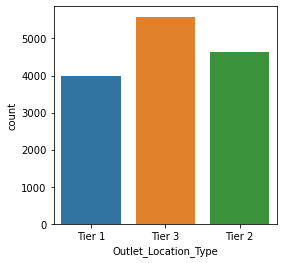

In [30]:
fig, ax =plt.subplots(figsize=(4,4))
sns.countplot(df['Outlet_Location_Type']);

Tier 3 outlet type is highest among Tier 1 & Tier 2

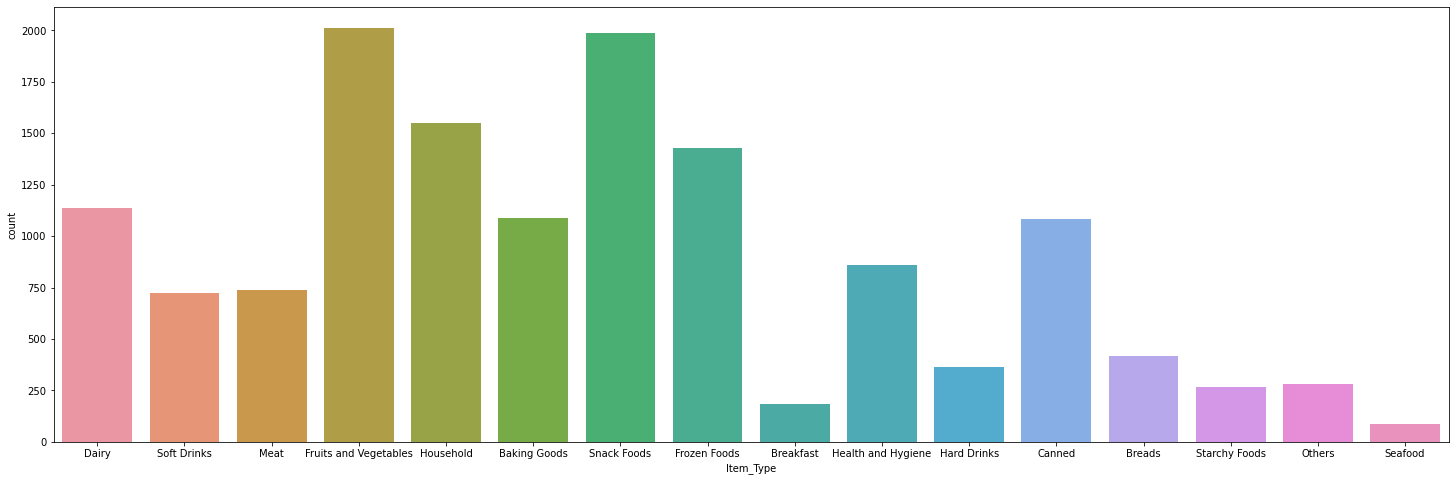

In [31]:
fig, ax =plt.subplots(figsize=(25,8))
sns.countplot(df['Item_Type']);

Shows different itme type and entries present in dataset.

Fruits & Vegetables has highest count present in dataset.

Sea food count is the least one.

# Missing Value

In [32]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
reference                       0
dtype: int64

Item weight, Outlet Size has higher value of missing value.

Item outlet sales shows missing value after merging with test set because test set do not have target variables.

Item weight & Outlet size is influencing Target Variable henc e cannot be dropped.

In [33]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0,np.nan)

In [34]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility               879
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
reference                       0
dtype: int64

4 col shows missing value which are treated as per there normality distribution.

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

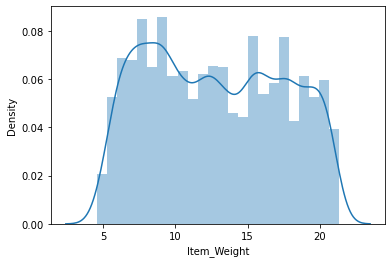

In [35]:
sns.distplot(df['Item_Weight'])

Missing value will be treated by Median as distribution is not Normal.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

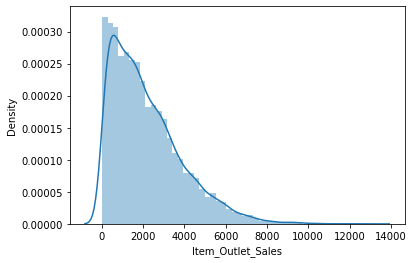

In [36]:
sns.distplot(df['Item_Outlet_Sales'])

Missing value will be treated by Median as distribution is not Normal

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

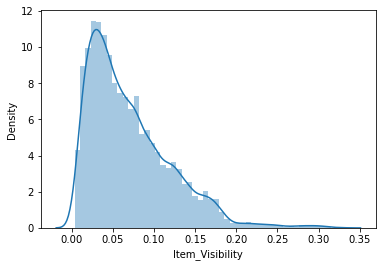

In [37]:
sns.distplot(df['Item_Visibility'])

Missing value will be treated by Median as distribution is not Normal.

In [38]:
df["Item_Outlet_Sales"] = df["Item_Outlet_Sales"].fillna(df["Item_Outlet_Sales"].median())
df["Item_Visibility"] = df["Item_Visibility"].fillna(df["Item_Visibility"].median())
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].median())
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].value_counts().idxmax())

In [39]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
reference                    0
dtype: int64

No Missing value seen after treatment

# Separating Object & Numeric Column Analysis.

In [40]:
numerics = ['float64', 'int64']
numeric_ds = df.select_dtypes(include=numerics)
objects_ds = df.select_dtypes(exclude=numerics)

In [41]:
objects_ds.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,reference
count,14204,14204,14204,14204,14204,14204,14204,14204
unique,1559,2,16,10,3,3,4,2
top,DRZ24,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1,train
freq,10,9185,2013,1559,8671,5583,9294,8523


In [42]:
numeric_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.759739,0.069533,141.004977,1997.830681,2026.522094
std,4.234851,0.048683,62.086938,8.371664,1335.388924
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.300000,0.033143,94.012000,1987.000000,1468.089000
50%,12.600000,0.057851,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

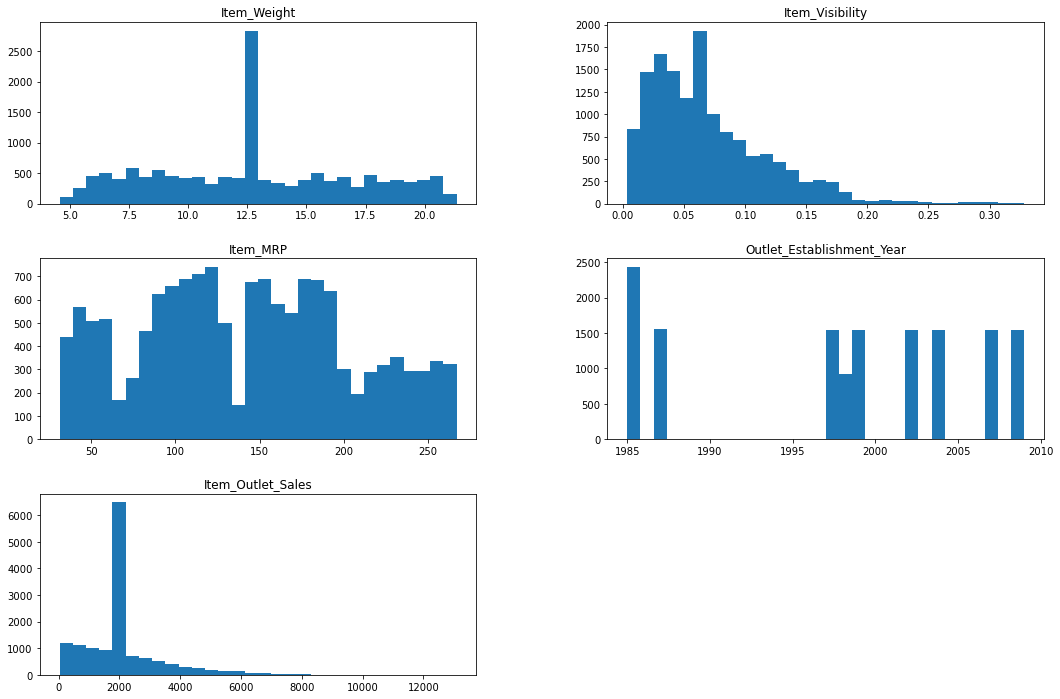

In [43]:
numeric_ds.hist(grid=False, figsize=(18,12), bins=30)

Skewness is visible in item visbility and target col.

# Skewness Detection

In [44]:
numeric_ds.skew()

Item_Weight                  0.134711
Item_Visibility              1.344050
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.813869
dtype: float64

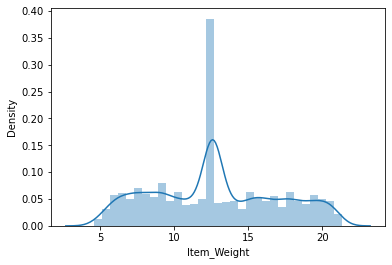

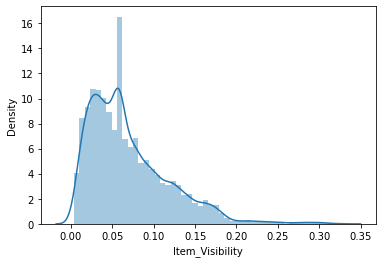

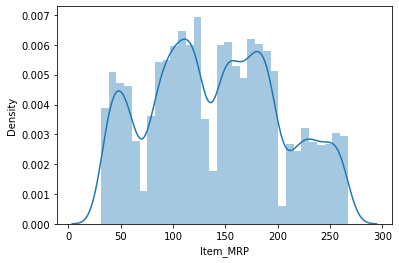

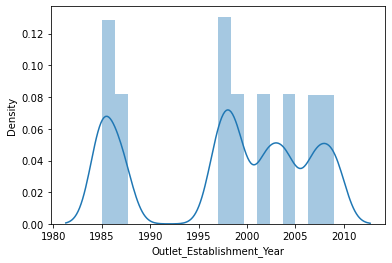

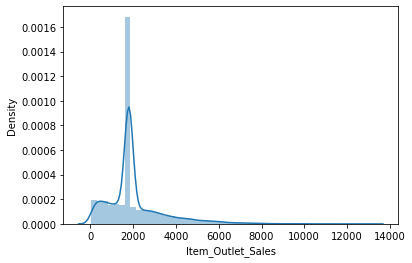

In [45]:
for i in numeric_ds:
    plt.figure()
    sns.distplot(numeric_ds[i])

# Correlation & HeatMap

In [46]:
numeric_dscor=numeric_ds.corr()
numeric_dscor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.016986,0.033008,0.012448,0.009623
Item_Visibility,-0.016986,1.000000,-0.008522,-0.088450,-0.102564
Item_MRP,0.033008,-0.008522,1.000000,0.000141,0.436478
Outlet_Establishment_Year,0.012448,-0.088450,0.000141,1.000000,-0.037651
Item_Outlet_Sales,0.009623,-0.102564,0.436478,-0.037651,1.000000


Target Col shows positive correlation with Item MRP col.

Target col shows most of the high negative correlation with independent variable except Item MRP col

Most of the relationship shows high negative correlation among independent variable.

# Heatmap

<AxesSubplot:>

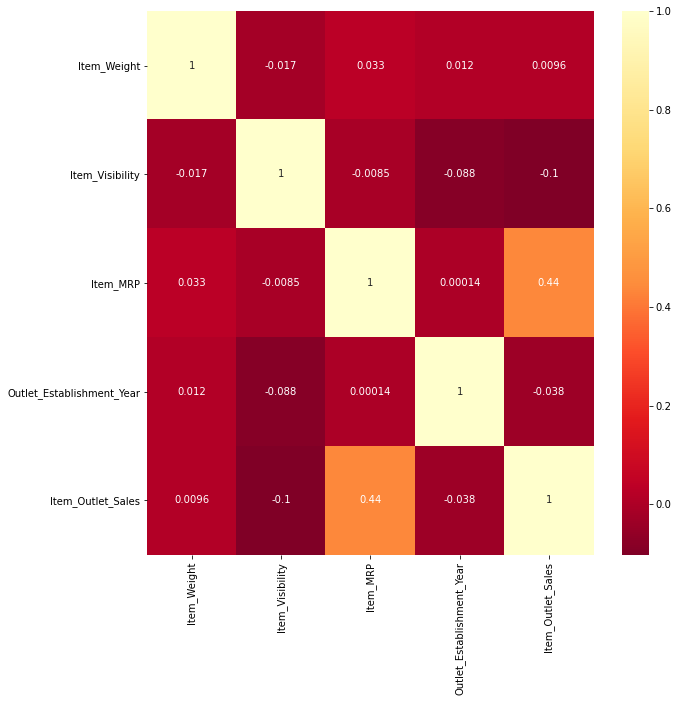

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(numeric_dscor,cmap='YlOrRd_r', annot=True)

In [48]:
dfcor=df.corr()
dfcor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.016986,0.033008,0.012448,0.009623
Item_Visibility,-0.016986,1.000000,-0.008522,-0.088450,-0.102564
Item_MRP,0.033008,-0.008522,1.000000,0.000141,0.436478
Outlet_Establishment_Year,0.012448,-0.088450,0.000141,1.000000,-0.037651
Item_Outlet_Sales,0.009623,-0.102564,0.436478,-0.037651,1.000000


<AxesSubplot:>

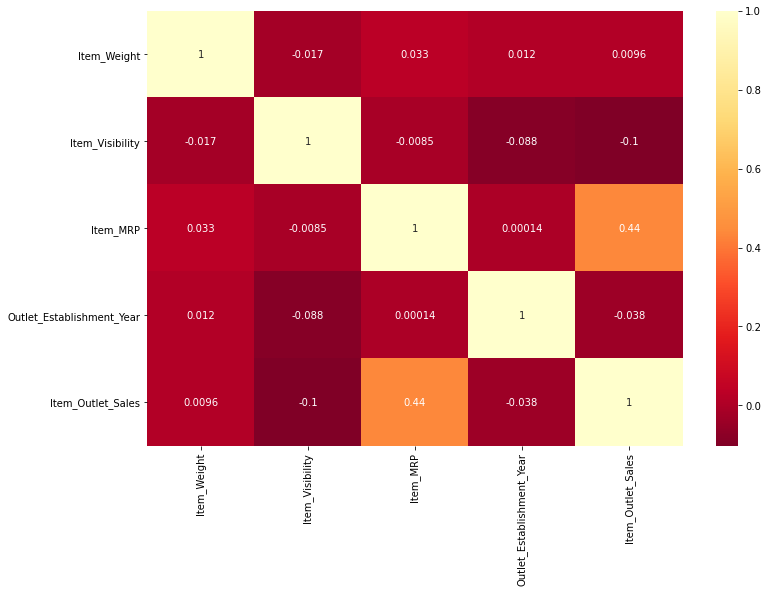

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='YlOrRd_r', annot=True)

# Label Encoder

In [50]:
cat_vars_list = objects_ds.columns.tolist()

le = LabelEncoder()
for i in cat_vars_list :
    df[i] = le.fit_transform(df[i])

# VIF:Multicollinearity Test

In [51]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

In [52]:
vif_calc()

    VIF Factor                   features
0     4.078708            Item_Identifier
1    10.131148                Item_Weight
2     1.605689           Item_Fat_Content
3     3.210502            Item_Visibility
4     4.049821                  Item_Type
5     7.906134                   Item_MRP
6    15.553192          Outlet_Identifier
7    58.676394  Outlet_Establishment_Year
8     8.018914                Outlet_Size
9    16.617669       Outlet_Location_Type
10    8.900204                Outlet_Type
11    4.863136          Item_Outlet_Sales
12    2.575490                  reference


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  int32  
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int32  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int32  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int32  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int32  
 9   Outlet_Location_Type       14204 non-null  int32  
 10  Outlet_Type                14204 non-null  int32  
 11  Item_Outlet_Sales          14204 non-null  float64
 12  reference                  14204 non-null  int32  
dtypes: float64(4), int32(8), int64(1)
memory usage:

After label encoded all objects col got converted to float or int.

In [54]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,reference
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,1
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1
3,1121,19.20,1,0.057851,6,182.0950,0,1998,1,2,0,732.3800,1
4,1297,8.93,0,0.057851,9,53.8614,1,1987,0,2,1,994.7052,1


# Outliers Detection & Removal

<AxesSubplot:>

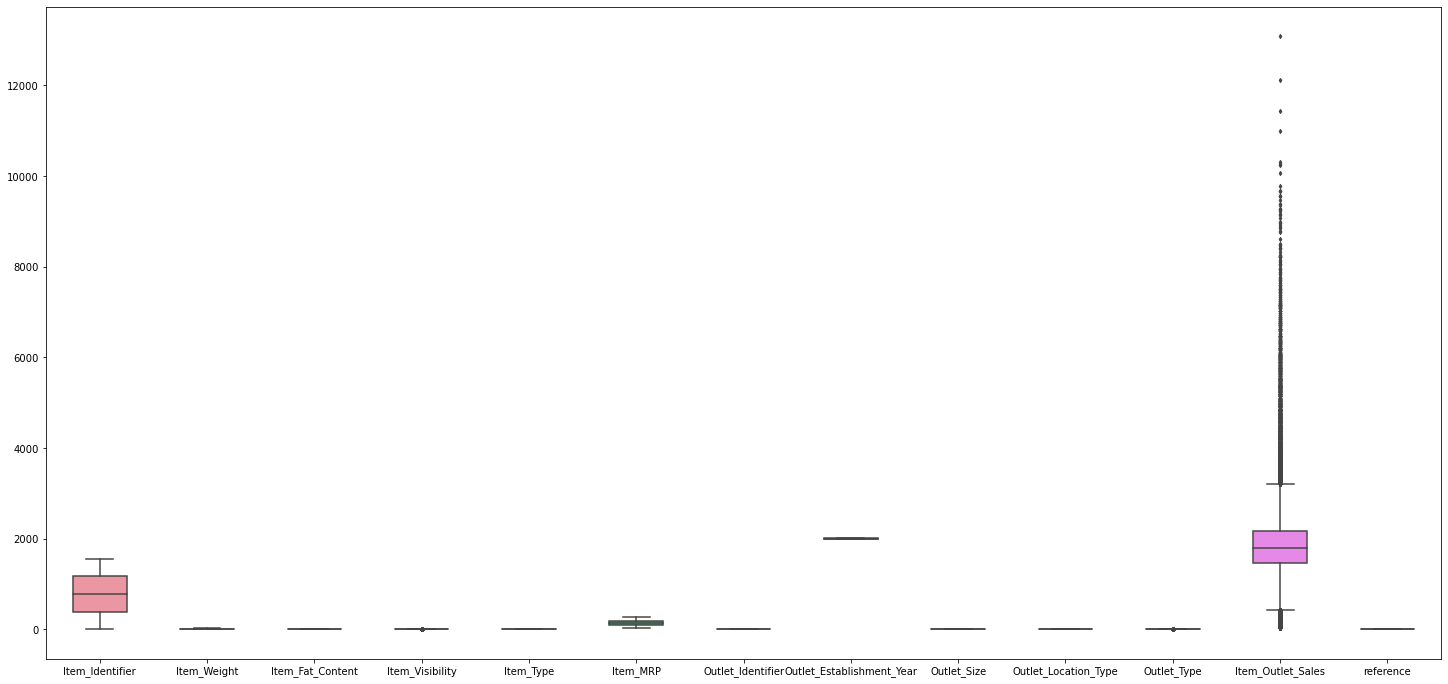

In [55]:
fig, ax =plt.subplots(figsize=(25,12))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

Target Col shows very high values.

In [56]:
#detecting outliers
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([   43,    49,    55,    83,   108,   130,   132,   145,   146,
         174,   203,   240,   243,   275,   276,   281,   304,   333,
         337,   352,   373,   402,   424,   434,   456,   472,   497,
         502,   521,   532,   640,   641,   661,   694,   753,   809,
         844,   847,   854,   903,   915,   935,   981,   991,   997,
        1009,  1012,  1040,  1043,  1044,  1067,  1092,  1113,  1127,
        1138,  1159,  1206,  1254,  1272,  1291,  1311,  1324,  1348,
        1363,  1393,  1434,  1450,  1467,  1496,  1501,  1506,  1560,
        1564,  1565,  1575,  1601,  1611,  1627,  1644,  1650,  1651,
        1658,  1669,  1700,  1705,  1709,  1710,  1751,  1805,  1821,
        1827,  1835,  1841,  1859,  1879,  1903,  1925,  1987,  1996,
        1998,  2040,  2088,  2107,  2109,  2122,  2216,  2238,  2251,
        2282,  2293,  2324,  2336,  2437,  2439,  2445,  2516,  2528,
        2535,  2549,  2586,  2589,  2599,  2613,  2615,  2648,  2680,
        2687,  2728

In [57]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

df=dfnew

dfnew.shape= (13740, 13)


No of observation got reduced after removing outliers.

In [58]:
Data_loss=((14204-13740)/14204)*100
Data_loss

3.2666854407209236

# Skewness Removal

In [59]:
numeric_ds.skew()

Item_Weight                  0.134711
Item_Visibility              1.344050
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.813869
dtype: float64

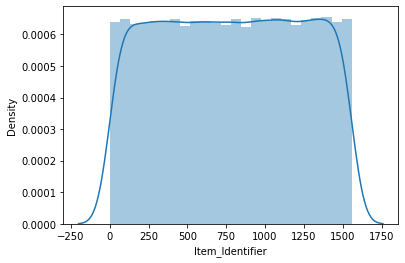

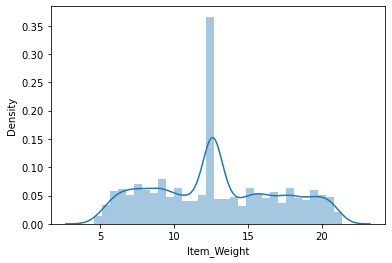

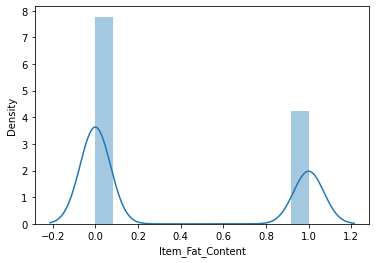

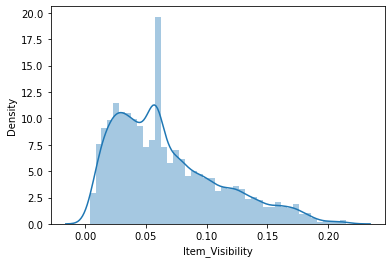

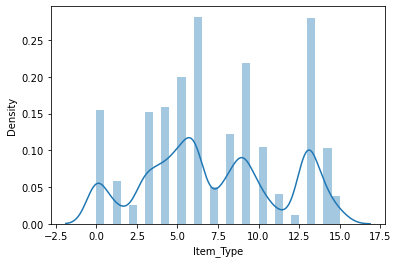

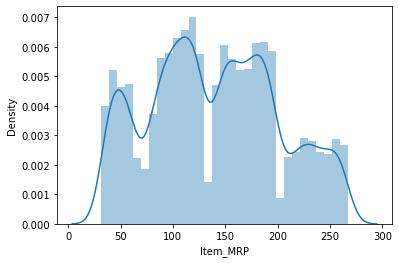

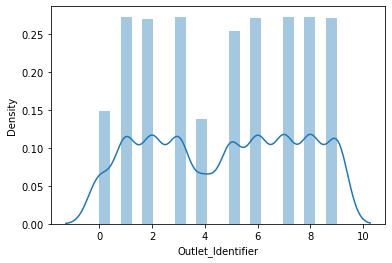

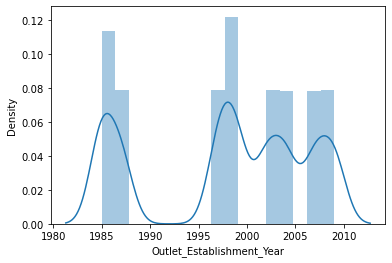

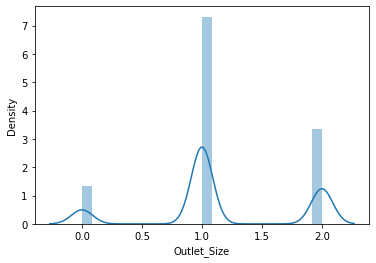

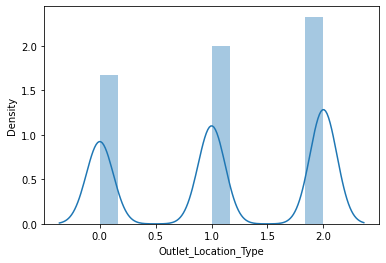

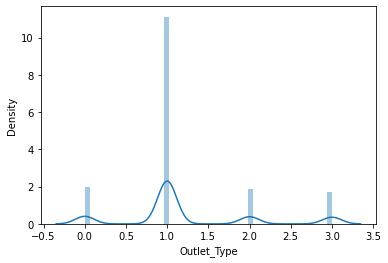

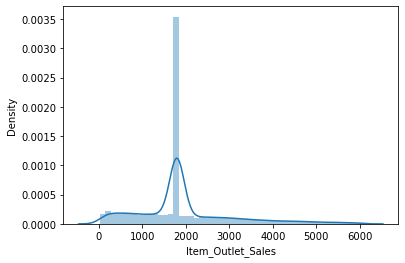

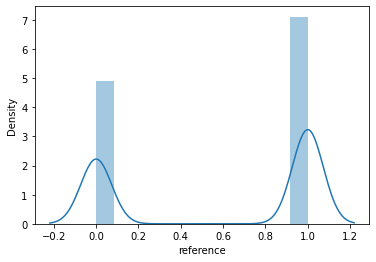

In [60]:
for i in df:
    plt.figure()
    sns.distplot(df[i])

In [61]:
df['Item_Visibility']=np.sqrt(df['Item_Visibility'])
df['Item_Outlet_Sales']=np.sqrt(df['Item_Outlet_Sales'])
df.skew()

Item_Identifier             -0.005679
Item_Weight                  0.131492
Item_Fat_Content             0.618665
Item_Visibility              0.253224
Item_Type                    0.094148
Item_MRP                     0.150574
Outlet_Identifier           -0.065614
Outlet_Establishment_Year   -0.426969
Outlet_Size                 -0.088573
Outlet_Location_Type        -0.199912
Outlet_Type                  0.960485
Item_Outlet_Sales           -0.031420
reference                   -0.377169
dtype: float64

In [62]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,reference
0,156,9.30,0,0.126678,4,249.8092,9,1999,1,0,1,61.115775,1
1,8,5.92,1,0.138846,14,48.2692,3,2009,1,2,2,21.057607,1
2,662,17.50,0,0.129461,10,141.6180,9,1999,1,0,1,45.795961,1
3,1121,19.20,1,0.240522,6,182.0950,0,1998,1,2,0,27.062520,1
4,1297,8.93,0,0.240522,9,53.8614,1,1987,0,2,1,31.538947,1


In [63]:
df['reference'].value_counts()

1    8143
0    5597
Name: reference, dtype: int64

Train value of reference col is labled with value 1

Test value of reference col is labled with value 0

# Dividing df in to train & test dataframe:

In [64]:
#splitting treated dataframe with train & test set.
grouped = df.groupby(df.reference)
#all the values present with 1 in reference col is grouped with trainm dataframe.
trainm = grouped.get_group(1)

In [65]:
trainm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,reference
0,156,9.30,0,0.126678,4,249.8092,9,1999,1,0,1,61.115775,1
1,8,5.92,1,0.138846,14,48.2692,3,2009,1,2,2,21.057607,1
2,662,17.50,0,0.129461,10,141.6180,9,1999,1,0,1,45.795961,1
3,1121,19.20,1,0.240522,6,182.0950,0,1998,1,2,0,27.062520,1
4,1297,8.93,0,0.240522,9,53.8614,1,1987,0,2,1,31.538947,1


In [66]:
#all the values present with 0 in reference col is grouped with testm dataframe.
testm = grouped.get_group(0)
testm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,reference
0,1114,20.750,0,0.086976,13,107.8622,9,1999,1,0,1,42.359544,0
1,1078,8.300,1,0.196030,4,87.3198,2,2007,1,1,1,42.359544,0
2,1420,14.600,0,0.315555,11,241.7538,0,1998,1,2,0,42.359544,0
3,817,7.315,0,0.124050,13,155.0340,2,2007,1,1,1,42.359544,0
4,1197,12.600,1,0.344383,4,234.2300,5,1985,1,2,3,42.359544,0


In [67]:
trainm.shape

(8143, 13)

In [68]:
testm.shape

(5597, 13)

In [69]:
#reference col will be dropped whose purpose is met for splitting the dataframe.
trainm.drop(['reference'],axis=1, inplace=True)
testm.drop(['reference'],axis=1, inplace=True)

In [70]:
trainm.shape, testm.shape

((8143, 12), (5597, 12))

shows 12 col after removing reference column

In [71]:
testm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1114,20.750,0,0.086976,13,107.8622,9,1999,1,0,1,42.359544
1,1078,8.300,1,0.196030,4,87.3198,2,2007,1,1,1,42.359544
2,1420,14.600,0,0.315555,11,241.7538,0,1998,1,2,0,42.359544
3,817,7.315,0,0.124050,13,155.0340,2,2007,1,1,1,42.359544
4,1197,12.600,1,0.344383,4,234.2300,5,1985,1,2,3,42.359544


reference col is not seen testm dataframe.

# Model will build on trainm dataframe & best model will be applied on test df

In [72]:
x=trainm.iloc[:,0:11]
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.126678,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.138846,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.129461,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.240522,6,182.0950,0,1998,1,2,0
4,1297,8.930,0,0.240522,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.238293,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.216754,0,108.1570,7,2002,1,1,1
8520,1357,10.600,0,0.187580,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.381078,13,103.1332,3,2009,1,2,2


In [73]:
y=trainm.iloc[:,11]
y

0       61.115775
1       21.057607
2       45.795961
3       27.062520
4       31.538947
          ...    
8518    52.710373
8519    23.436830
8520    34.541477
8521    42.960419
8522    27.670743
Name: Item_Outlet_Sales, Length: 8143, dtype: float64

In [74]:
x.shape, y.shape

((8143, 11), (8143,))

In [75]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=i)
    
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred=DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)

In [76]:
leastMAE=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred = DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    if MAE>leastMAE:
        leastMAE=MAE
        maxRS=i
print("Least MAE ", leastMAE," on Random_state ",maxRS)

Least MAE  11.406677600677307  on Random_state  68


The best raqndom state shows at 68 iteration with MAE value = 11.47

# Splitting dataset x train, x test, y train y test

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 191)

In [78]:
print("x-train shape: ", x_train.shape)
print("x-test shape: ", x_test.shape)
print("y-train shape: ", y_train.shape)
print("y-test shape: ", y_test.shape)

x-train shape:  (5700, 11)
x-test shape:  (2443, 11)
y-train shape:  (5700,)
y-test shape:  (2443,)


# Creating ML Algorithm

# Linear Regression


In [79]:
lm = LinearRegression()
lm.fit(x_train,y_train) 
pred=lm.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))
lm.score(x_train,y_train)# how well the model learned

Mean Absolute error:  9.178713214749012


0.5310833181278329

LR shows MAE value = 9.17 with model learned with 53%

# Random Forest Regressor

In [80]:
RFR = RandomForestRegressor() 
RFR.fit(x_train, y_train) 
pred = RFR.predict(x_test) 
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) 
RFR.score(x_train,y_train)

Mean Absolute error:  8.205105833414422


0.9462887605674577

LR shows MAE value = 8.2 with model learned with 94.6%

# Support Vector Regressor

In [81]:
SV = SVR()
SV.fit(x_train, y_train) 
pred = SV.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))
SV.score(x_train,y_train)

Mean Absolute error:  12.476997030960165


0.18662848573817992

SVR shows MAE value = 12.47 with model learned with 18.66%

# XGBoost Regressor

In [83]:
XGBR = XGBRegressor() 
XGBR.fit(x_train,y_train)
pred = XGBR.predict(x_test)
print('Mean Absolute error: ', mean_absolute_error(y_test,pred))
XGBR.score(x_train,y_train)

Mean Absolute error:  8.46397640202546


0.8779308899130536

XGBoost shows MAE value = 8.46 with model learned with 87.79%

# Kfold Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score  # Obs : Importing cross val score
from sklearn.model_selection import KFold
cross_validation=KFold(5, shuffle =True) 

In [85]:
 # Linear Regression
print(cross_val_score(lm,x,y,cv=cross_validation).mean())

0.5323975688230316


In [86]:
# Random Forest Regressor
print(cross_val_score(RFR,x,y,cv=cross_validation).mean())

0.6135629312735937


In [87]:
 # Support Vector Regressor
print(cross_val_score(SV,x,y,cv=cross_validation).mean())

0.19418304820599414


In [88]:
 # XGBoost Regressor
print(cross_val_score(XGBR,x,y,cv=cross_validation).mean())

0.6006317813884625


From the above its clear that Random Forest Regressor is the best model

# Hyperparameter & GridsearchCV

In [89]:
from sklearn.model_selection import GridSearchCV # importing GridSearchCV
import numpy as np
parameter = {'max_depth': np.arange(2,10),
             'max_features': ['log2','sqrt','auto'],
             'min_samples_leaf': [1,2],
             'n_estimators': [100]}

In [90]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=cross_validation)

In [91]:
GCV.fit(x_train,y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 2], 'n_estimators': [100]})

In [92]:
GCV.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 100}

# Preparing testm df for prediction by best model.

In [100]:
testm.shape

(5597, 12)

In [94]:
testx=testm.iloc[:,0:11]
testx.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1114,20.750,0,0.086976,13,107.8622,9,1999,1,0,1
1,1078,8.300,1,0.196030,4,87.3198,2,2007,1,1,1
2,1420,14.600,0,0.315555,11,241.7538,0,1998,1,2,0
3,817,7.315,0,0.124050,13,155.0340,2,2007,1,1,1
4,1197,12.600,1,0.344383,4,234.2300,5,1985,1,2,3


In [95]:
testy = testm.iloc[:,11]
testy.head()

0    42.359544
1    42.359544
2    42.359544
3    42.359544
4    42.359544
Name: Item_Outlet_Sales, dtype: float64

In [96]:
testx.shape, testy.shape

((5597, 11), (5597,))

# Best Model

In [97]:
Final_mod = RandomForestRegressor(bootstrap = True, max_depth = 6, max_features = 'auto', min_samples_leaf = 1,n_estimators= 100)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
predtx=Final_mod.predict(testx)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))
print('Mean Absolute error_test_set: ',mean_absolute_error(testy,predtx))

Mean Absolute error:  7.6093944510591545
Mean Absolute error_test_set:  11.464383344545356


train set has MAE value of 7.68

test set has MAE value of 11.51

In [98]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']